## Gradient Descent

Gradient Descent is an iterative optimization algorithm used to minimize a cost (loss) function.

---

### Simple Model

We use a simple linear model:

y = w x

where:
- w = weight (parameter)
- x = input
- y = output

---

### Steps of Gradient Descent

#### 1. Initialization

Initialize the parameter (weight):

w = 0  

Choose a learning rate (α), which controls the step size:

α = 0.1  

Given a data point:

x = 1, y = 2

---

#### 2. Compute Cost Function

We use squared error as the loss function:

Loss = (w x - y)²  

For w = 0:

Loss = (0 × 1 - 2)²  
Loss = (-2)² = 4  

---

#### 3. Find the Gradient

The gradient is the derivative of the loss with respect to w.

Loss = (w x - y)²  

Derivative:

d(Loss)/dw = 2 (w x - y) x  

For x = 1:

Gradient = 2 (w - y)  

At w = 0:

Gradient = 2 (0 - 2) = -4  

---

#### 4. Update the Weight

Update rule:

w_new = w_old - α × Gradient  

Substitute values:

w_new = 0 - 0.1 × (-4)  
w_new = 0.4  

---

#### 5. Iterate

Repeat steps 2–4 until the loss becomes very small.

Example next iterations:

w: 0 → 0.4 → 0.72 → 0.976 → ... → 2  

Eventually, w approaches 2, which minimizes the loss.

---

### Summary

Gradient Descent:
- starts with an initial guess,
- computes the error,
- finds the gradient (direction of steepest increase),
- moves in the opposite direction to reduce error,
- repeats until convergence.

It is called an iterative optimization algorithm because it repeatedly updates parameters to minimize the loss.


## Gradient Descent Visualization 

Lets take moment to understand the how Gradient Descent opeartes in practical terms.

We are creating a simple convex function y = (x-5)^2 to demonstrate the concept of gradient descent. The minimum value of this function occurs at x = 5, where the cost is zero.

We will visualize this convex function using a plot and then demonstrate how the gradient descent approach can be used to find the minimum point of the function.

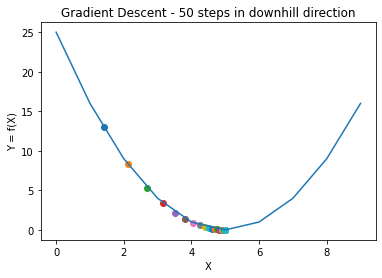

In [31]:
import time
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    return (x-5)**2

def grad_f(x):
    return 2*(x-5)


X = np.arange(10)

Y = f(X)

fig = plt.figure()

plt.ion()
plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("Y = f(X)")
plt.title("Gradient Descent - 50 steps in downhill direction")


x = 0.5
lr = 0.1
errors = []
for i in range(50):
    g = grad_f(x)
    x = x - lr*g
    y = f(x)
    error = y-0
    errors.append(error)
    plt.scatter(x, y)
    fig.canvas.draw()
    time.sleep(0.5)
plt.show()



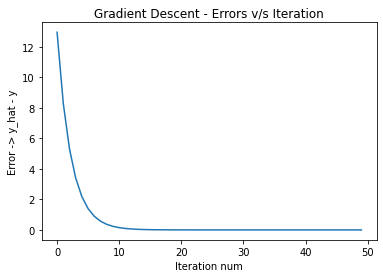

In [32]:
plt.plot(errors)
plt.xlabel("Iteration num")
plt.ylabel("Error -> y_hat - y")
plt.title("Gradient Descent - Errors v/s Iteration")
plt.show()

###  Gradient descent from scratch on real‑world data 

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("CarPred.csv")

In [35]:
X = df["max_power"]
Y = df["selling_price"]

# Normalisation

u = X.mean()
std = X.std()

X = (X-u)/std

In [36]:
def hypothesis(x, theta):
    y_hat = theta[0] + theta[1]*x 
    return y_hat

In [37]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_hat=hypothesis(x, theta)
        y=Y[i]
        grad[0] += (y_hat - y)
        grad[1] += (y_hat - y) * x 

    return grad/m


In [38]:
def error(X,Y, theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        x = X[i]
        y_hat = hypothesis(x, theta)
        y = Y[i]

        error = (y_hat - y)**2
        total_error += error
    return total_error/m


In [39]:
def gradient_descent(X,Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list =[]
    theta_list =[]

    for i in range(max_steps):
        grad = gradient(X,Y, theta)

        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        e = error(X,Y, theta)

        error_list.append(e)
        theta_list.append((theta[0], theta[1]))
    return theta, error_list, theta_list

In [41]:
theta, error_list, theta_list = gradient_descent(X,Y,max_steps=50)
print(theta)

[264899.50073976  63179.87873954]


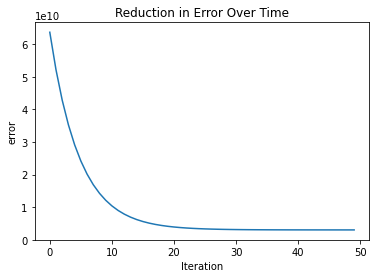

In [43]:
fig = plt.figure()

plt.plot(error_list)
plt.xlabel("Iteration")
plt.ylabel("error")
plt.title('Reduction in Error Over Time')
plt.show()

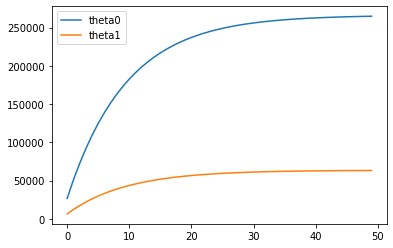

In [44]:
theta_list = np.array(theta_list)

plt.plot(theta_list[:,0], label = 'theta0')
plt.plot(theta_list[:,1], label ='theta1')
plt.legend()
plt.show()